In [ ]:
!pip install kaggle

from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d erogluegemen/cat-catloaf-classification

!unzip cat-catloaf-classification.zip -d cat_loaf_dataset


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/erogluegemen/cat-catloaf-classification
License(s): CC0-1.0
  0% 0.00/4.15M [00:00<?, ?B/s]
100% 4.15M/4.15M [00:00<00:00, 58.7MB/s]
Archive:  cat-catloaf-classification.zip
  inflating: cat_loaf_dataset/images/cat/cat_1.jpg  
  inflating: cat_loaf_dataset/images/cat/cat_10.jpg  
  inflating: cat_loaf_dataset/images/cat/cat_100.jpg  
  inflating: cat_loaf_dataset/images/cat/cat_101.jpg  
  inflating: cat_loaf_dataset/images/cat/cat_102.jpg  
  inflating: cat_loaf_dataset/images/cat/cat_103.jpg  
  inflating: cat_loaf_dataset/images/cat/cat_104.jpg  
  inflating: cat_loaf_dataset/images/cat/cat_105.jpg  
  inflating: cat_loaf_dataset/images/cat/cat_106.jpg  
  inflating: cat_loaf_dataset/images/cat/cat_107.jpg  
  inflating: cat_loaf_dataset/images/cat/cat_108.jpg  
  inflating: cat_loaf_dataset/images/cat/cat_109.jpeg  
  inflating: cat_loaf_dataset/images/cat/cat_11.jpg  
  inflating: cat_loaf_dataset/image

In [ ]:
!pip install tensorflow numpy matplotlib

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob

In [ ]:
print(os.listdir("cat_loaf_dataset/images"))

['loaf', 'cat']


In [ ]:
dataset_path = "cat_loaf_dataset/images"
image_paths = glob(os.path.join(dataset_path, "*", "*.jpg"))
image_paths = sorted(image_paths)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(100, 100),
    batch_size=32
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(100, 100),
    batch_size=32
)

class_names = train_ds.class_names
print(f"Class names: {class_names}")

Found 646 files belonging to 2 classes.
Using 517 files for training.
Found 646 files belonging to 2 classes.
Using 129 files for validation.
Class names: ['cat', 'loaf']


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

In [ ]:
model = keras.Sequential([
    layers.Rescaling(1./255, input_shape=(100, 100, 3)),
    layers.Conv2D(32, (3,3), activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3,3), activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(2, activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,638,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,732,034 (6.61 MB)

 Trainable params: 1,732,034 (6.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs = 128
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/128
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9033 - loss: 0.2245 - val_accuracy: 0.6744 - val_loss: 2.2122
Epoch 2/128
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9864 - loss: 0.0601 - val_accuracy: 0.6434 - val_loss: 3.4185
Epoch 3/128
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9895 - loss: 0.0351 - val_accuracy: 0.6899 - val_loss: 3.1933
Epoch 4/128
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9971 - loss: 0.0145 - val_accuracy: 0.6744 - val_loss: 3.4380
Epoch 5/128
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9965 - loss: 0.0093 - val_accuracy: 0.6899 - val_loss: 3.7258
Epoch 6/128
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9986 - loss: 0.0064 - val_accuracy: 0.6667 - val_loss: 4.0364
Epoch 7/128
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.0038 - val_accuracy: 0.6667 - val_loss: 3.9287
Epoch 8/128
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 0.

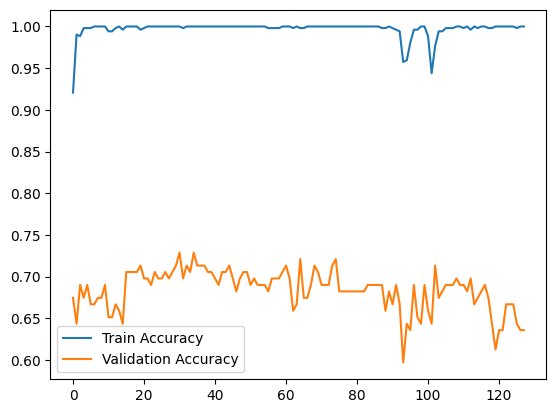

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(val_ds)
print(f"Validation Accuracy: {accuracy:.2f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6238 - loss: 4.7319 
Validation Accuracy: 0.64


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


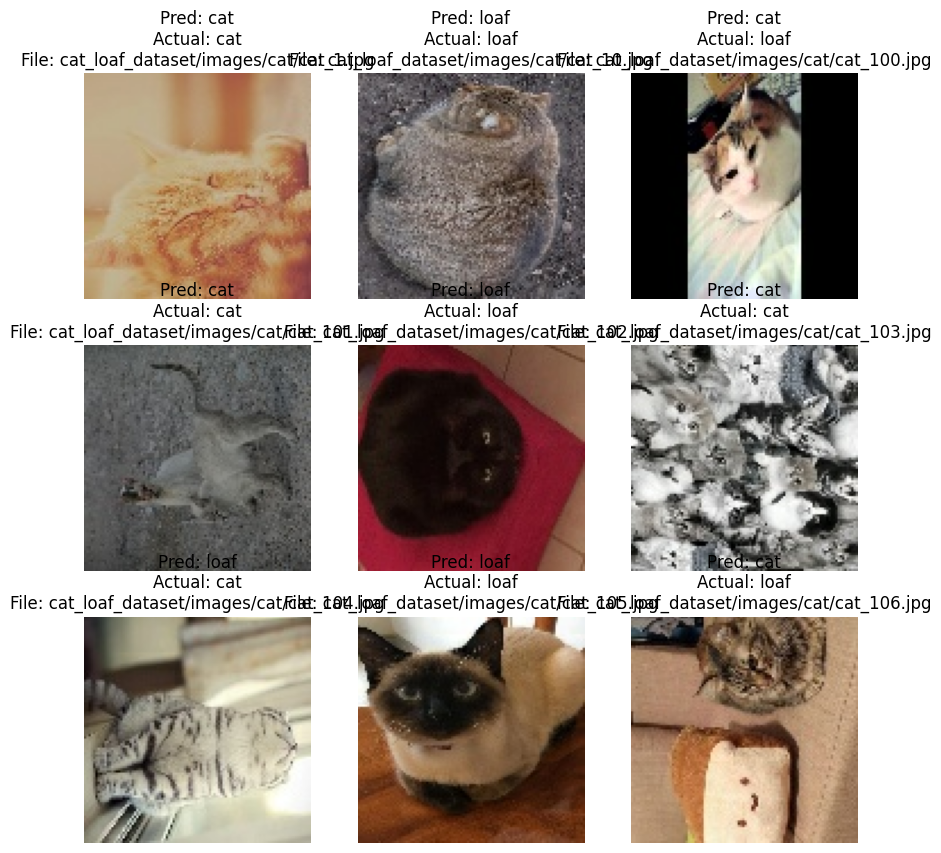

In [ ]:
import matplotlib.pyplot as plt

for batch, (images, labels) in enumerate(val_ds.take(1)):
    predictions = model.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)

    plt.figure(figsize=(10, 10))
    for i in range(min(9, len(images))):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Pred: {class_names[predicted_classes[i]]}\nActual: {class_names[labels[i]]}\nFile: {image_paths[batch * 32 + i]}")
        plt.axis("off")
    plt.show()
    break

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


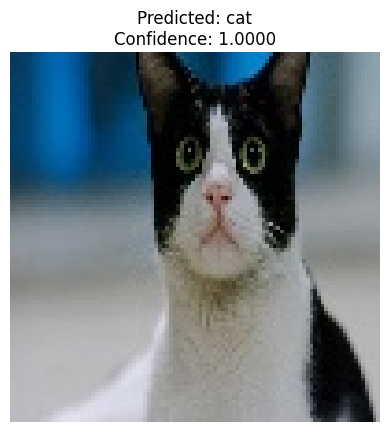

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

img_path = "cat_loaf_dataset/images/cat/cat_163.jpg"

img = image.load_img(img_path, target_size=(100, 100))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

predictions = model.predict(img_array)
predicted_index = np.argmax(predictions)
predicted_class = class_names[predicted_index]

plt.imshow(img)
plt.title(f"Predicted: {predicted_class}\nConfidence: {predictions[0][predicted_index]:.4f}")
plt.axis("off")
plt.show()



Selected File: loaf_cat_61.jpg
Full Path: cat_loaf_dataset/images/loaf/loaf_cat_61.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


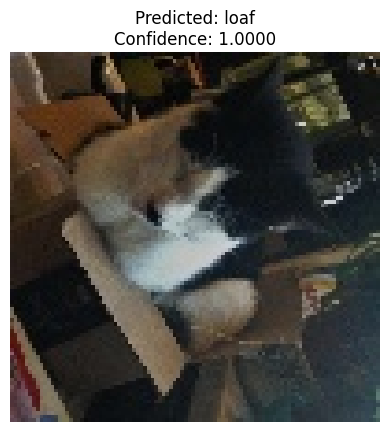

In [ ]:
import numpy as np
import random
import os
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

dataset_dir = "cat_loaf_dataset/images"
categories = ["cat", "loaf"]
selected_category = random.choice(categories)
random_index = random.randint(1, 323)

if selected_category == "cat":
    img_filename = f"cat_{random_index}.jpg"
else:
    img_filename = f"loaf_cat_{random_index}.jpg"

img_path = os.path.join(dataset_dir, selected_category, img_filename)

print(f"Selected File: {img_filename}")
print(f"Full Path: {img_path}")

img = image.load_img(img_path, target_size=(100, 100))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

predictions = model.predict(img_array)
predicted_index = np.argmax(predictions)
predicted_class = class_names[predicted_index]

plt.imshow(img)
plt.title(f"Predicted: {predicted_class}\nConfidence: {predictions[0][predicted_index]:.4f}")
plt.axis("off")
plt.show()
